In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#load data as pandas dataframe
data_csv = pd.read_csv('ONE PIECE.csv')
data_json = pd.read_json('One_Piece.json')

In [6]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      958 non-null    int64  
 1   rank            958 non-null    object 
 2   trend           958 non-null    object 
 3   season          958 non-null    int64  
 4   episode         958 non-null    int64  
 5   name            958 non-null    object 
 6   start           958 non-null    int64  
 7   total_votes     958 non-null    object 
 8   average_rating  958 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 67.5+ KB


In [7]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            560 non-null    object 
 1   start           560 non-null    int64  
 2   total_votes     560 non-null    object 
 3   average_rating  560 non-null    float64
 4   Unnamed: 0      559 non-null    float64
 5   rank            559 non-null    object 
 6   trend           559 non-null    object 
 7   season          559 non-null    float64
 8   episode         559 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 39.5+ KB


# MErging

In [8]:
# get common columns names from both dataframes
common_columns = list(set(data_csv.columns).intersection(set(data_json.columns)))
common_columns

['season',
 'name',
 'episode',
 'rank',
 'start',
 'trend',
 'Unnamed: 0',
 'total_votes',
 'average_rating']

In [9]:
# merge dataframes on common columns
data_merged = pd.merge(data_csv, data_json, on=common_columns)
#data_merged = data_csv.merge(data_csv, data_json, on=['name'])

In [8]:
data_merged

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,399,"53,504",5,1,400,Roger to Rayleigh: Kaizoku Ou to Sono Migiude,2009,176,8.5
1,400,"64,260",1,1,401,Kaihi Fukanou!? Taishou Kizaru no Kousoku no Keri,2009,144,8.3
2,401,"65,532",2,1,402,Attouteki! Kaigun no Sentou Heiki Pacifista,2009,140,8.3
3,402,"62,992",3,1,403,Saranaru Kyouteki Arawaru! Masakari Katsuida S...,2009,145,8.4
4,403,"48,214",7,1,404,Taishou Kizuru no Moukou Mugiwara Ichimi Zetta...,2009,189,8.8
...,...,...,...,...,...,...,...,...,...
554,953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
555,954,"35,342",44,1,955,&quot;A New Alliance?! Kaido's Army Gathers&quot;,2020,407,7.4
556,955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2
557,956,"2,940",964,1,957,Big News! The Warlords Attack Incident,2021,"2,862",9.1


In [9]:
data_merged.drop_duplicates()
data_merged.dropna()
data_merged = data_merged.replace('-',np.nan)
data_merged.dropna()

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,399,"53,504",5,1,400,Roger to Rayleigh: Kaizoku Ou to Sono Migiude,2009,176,8.5
1,400,"64,260",1,1,401,Kaihi Fukanou!? Taishou Kizaru no Kousoku no Keri,2009,144,8.3
2,401,"65,532",2,1,402,Attouteki! Kaigun no Sentou Heiki Pacifista,2009,140,8.3
3,402,"62,992",3,1,403,Saranaru Kyouteki Arawaru! Masakari Katsuida S...,2009,145,8.4
4,403,"48,214",7,1,404,Taishou Kizuru no Moukou Mugiwara Ichimi Zetta...,2009,189,8.8
...,...,...,...,...,...,...,...,...,...
553,952,"45,193",28,1,953,Hiyori's Confession! Reunion on Oihagi Bridge,2020,249,8.0
554,953,"41,448",26,1,954,Its Name is Enma! Oden's Meito!,2020,302,7.7
555,954,"35,342",44,1,955,&quot;A New Alliance?! Kaido's Army Gathers&quot;,2020,407,7.4
556,955,"33,715",75,1,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353,8.2


In [10]:
median = data_merged['average_rating'].median()
mean = data_merged['average_rating'].mean()
rating = data_merged['average_rating'].max()
min = data_merged['average_rating'].min()
print(f'Median rating is : {median}')
print(f'mean rating is :{mean}')
print(f'max rating is : {rating}')
print(f'min rating is : {min}')

Median rating is : 7.8
mean rating is :7.847763864042933
max rating is : 9.6
min rating is : 5.6


(array([  4.,  10.,  26., 116., 206., 129.,  50.,  18.]),
 array([5.6, 6.1, 6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
 <BarContainer object of 8 artists>)

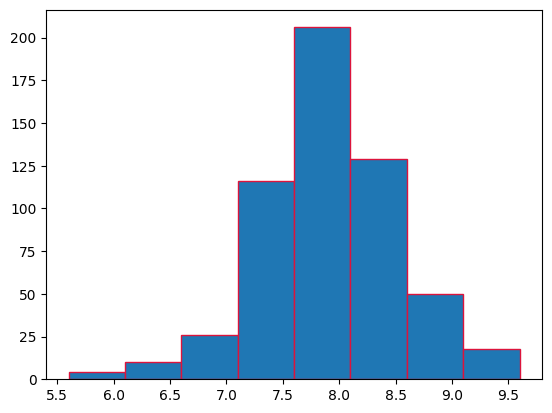

In [11]:
fig, ax = plt.subplots()
ax.hist(data_merged["average_rating"], bins=8, linewidth=1, edgecolor="crimson")

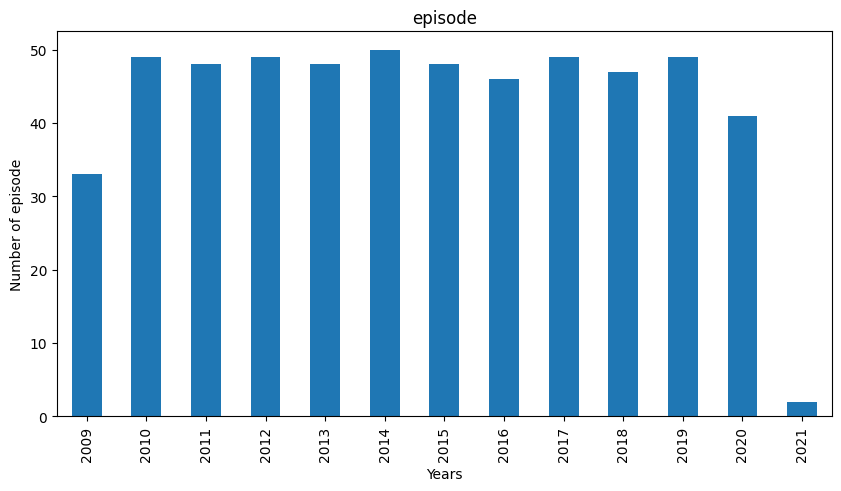

In [12]:
years = data_merged["start"].value_counts().sort_index()
fig = plt.figure(figsize = (10, 5))
years.plot.bar()
plt.xlabel("Years")
plt.ylabel("Number of episode")
plt.title("episode")
plt.show()

In [13]:
data_merged['trend'] = data_merged['trend'].replace(np.nan,"?")
data_merged.to_csv("new_one_peace.csv")